In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize
from matplotlib import pyplot as plt, dates
import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cnty_df = pd.read_csv('us-counties.csv')
cnty_df.date = pd.to_datetime(cnty_df.date,format='%Y-%m-%d')

In [5]:
utah_mask = cnty_df.state == 'Utah'
salt_lake_mask = cnty_df.county == 'Salt Lake'
utah_cnty_mask = cnty_df.county == 'Utah'
utah_cnty_df = cnty_df[utah_cnty_mask]
salt_cnty_df = cnty_df[salt_lake_mask]
utah_st_df = cnty_df[utah_mask]
washoe_mask = cnty_df.county == 'Washoe'
washoe_df = cnty_df[washoe_mask]
douglas_mask = cnty_df.county == 'Douglas'
nv_mask = cnty_df.state == 'Nevada'
doug_cnty_df = cnty_df[douglas_mask & nv_mask]
sc_mask = cnty_df.county == 'Santa Cruz'
cali_mask = cnty_df.state == 'California'
sc_df = cnty_df[sc_mask & cali_mask]
cc_mask = cnty_df.county == 'Carson City'
cc_df = cnty_df[cc_mask]
ind_mask = cnty_df.state == 'Indiana'
ken_mask = cnty_df.state == 'Kentucky'
jef_mask = cnty_df.county == 'Jefferson'
flo_mask = cnty_df.county == 'Floyd'
jef_df = cnty_df[ken_mask & jef_mask]
flo_df = cnty_df[ind_mask & flo_mask]

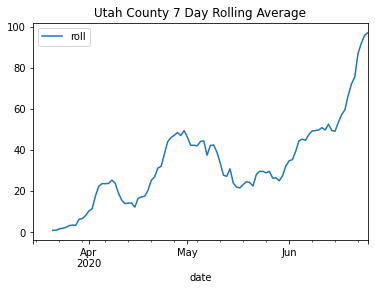

In [9]:
utah_cnty_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(utah_cnty_df.cases.values)])
utah_cnty_df.loc[:,'roll'] = utah_cnty_df.new_cases.rolling(window=7).mean()
utah_cnty_df.plot(x='date',y='roll',title='Utah County 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/utah_county.pdf')
# plt.clf()

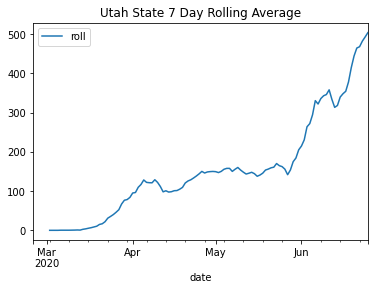

In [10]:
state_df = pd.read_csv('us-states.csv')
state_df.date = pd.to_datetime(state_df.date,format='%Y-%m-%d')
utah_mask = state_df.state == 'Utah'
utah_st_df = state_df[utah_mask]
utah_st_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(utah_st_df.cases.values)])
utah_st_df.loc[:,'roll'] = utah_st_df.new_cases.rolling(window=7).mean()
utah_st_df.plot(x='date',y='roll',title='Utah State 7 Day Rolling Average of Daily New Cases',legend=False)
# plt.savefig('visuals/utah_state.pdf')
plt.show()

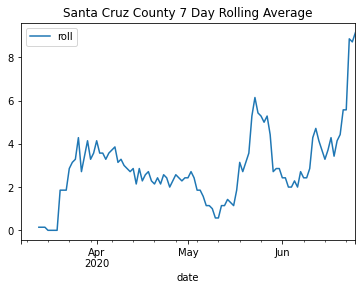

In [7]:
sc_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(sc_df.cases.values)])
sc_df.loc[:,'roll'] = sc_df.new_cases.rolling(window=7).mean()
sc_df.plot(x='date',y='roll',title='Santa Cruz County 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/santa_cruz_county.pdf')
plt.show()

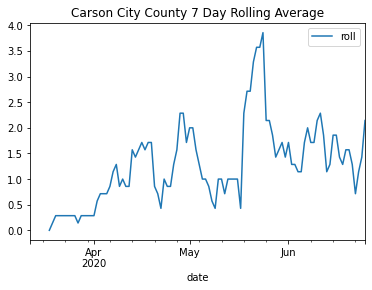

In [8]:
cc_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(cc_df.cases.values)])
cc_df.loc[:,'roll'] = cc_df.new_cases.rolling(window=7).mean()
cc_df.plot(x='date',y='roll',title='Carson City County 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/carson_city_county.pdf')
plt.show()

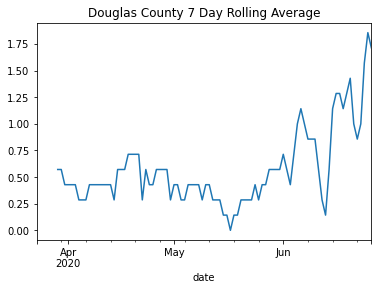

In [7]:
doug_cnty_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(doug_cnty_df.cases.values)])
doug_cnty_df.loc[:,'roll'] = doug_cnty_df.new_cases.rolling(window=7).mean()
doug_cnty_df.plot(x='date',y='roll',title='Douglas County 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/douglas_county.pdf')
plt.show()

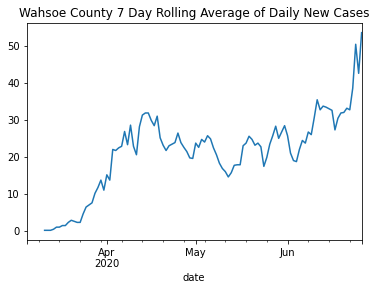

In [11]:
washoe_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(washoe_df.cases.values)])
washoe_df.loc[:,'roll'] = washoe_df.new_cases.rolling(window=7).mean()
washoe_df.plot(x='date',y='roll',title='Wahsoe County 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/washoe_county.pdf')
plt.show()

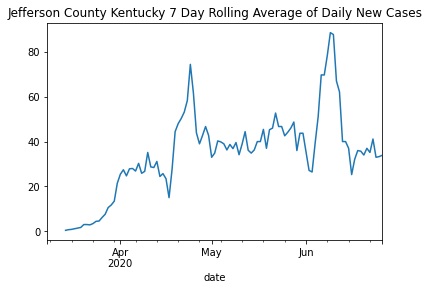

In [12]:
jef_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(jef_df.cases.values)])
jef_df.loc[:,'roll'] = jef_df.new_cases.rolling(window=7).mean()
jef_df.plot(x='date',y='roll',title='Jefferson County Kentucky 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/jefferson_county.pdf')
plt.show()

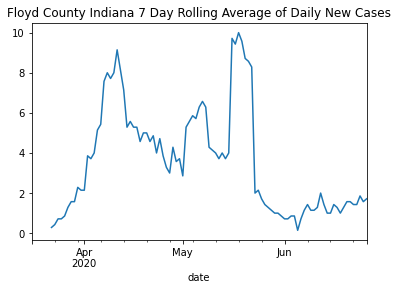

In [13]:
flo_df.loc[:,'new_cases'] = np.hstack([np.array([0]), np.diff(flo_df.cases.values)])
flo_df.loc[:,'roll'] = flo_df.new_cases.rolling(window=7).mean()
flo_df.plot(x='date',y='roll',title='Floyd County Indiana 7 Day Rolling Average of Daily New Cases',legend=False)
plt.savefig('visuals/jefferson_county.pdf')
plt.show()